# Práctica 03.  Entrega 02. Análisis estadístico de señales - Comparación estadística de Energía de señales EEG.

Estudiante: Camila Segura

Identificación: 1000795135

In [1]:
#Conectar colab con el drive de la universidad
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#librerias convencionales
from scipy.fftpack import fft;
import matplotlib.pyplot as plt;
import numpy as np;
import scipy.io as sio;
import numpy as np;
import matplotlib.pyplot as plt

## Importar datos de la carpeta .zip tanto para control como para Parkinson

In [3]:
!cp /content/drive/MyDrive/UdeA_BIOINGENIERIA/Bioseñales/Laboratorio/02/datos_senales_datos_parkinson_cursos.zip . #importante punto final
!unzip datos_senales_datos_parkinson_cursos.zip

Archive:  datos_senales_datos_parkinson_cursos.zip
   creating: control/
  inflating: control/C001R_EP_reposo.mat  
  inflating: control/C002_EP_reposo.mat  
  inflating: control/C004_EP_reposo.mat  
  inflating: control/C005_EP_reposo_Repetido.mat  
  inflating: control/C006_EP_reposo.mat  
  inflating: control/C007_EP_reposo.mat  
  inflating: control/C010_EP_reposo.mat  
  inflating: control/C011_EP_reposo.mat  
  inflating: control/C012_EP_reposo.mat  
  inflating: control/C013_EP_reposo.mat  
  inflating: control/C015_EP_reposo.mat  
  inflating: control/C018_EP_reposo.mat  
  inflating: control/C019_EP_reposo.mat  
  inflating: control/C020_EP_reposo.mat  
  inflating: control/C021_EP_reposo.mat  
  inflating: control/C023_EP_reposo.mat  
  inflating: control/C024_EP_reposo.mat  
  inflating: control/C025_EP_reposo.mat  
  inflating: control/C026_EP_reposo.mat  
  inflating: control/C027_EP_reposo.mat  
  inflating: control/C028_EP_reposo.mat  
  inflating: control/C029_EP_reposo

In [4]:
import os
directorio_actual=os.getcwd()
print(directorio_actual)

/content


1. Leer todos los archivos de la crapeta "control" y organizarlos para el desarrollo de la práctica. Esta sección del código es completamente aparte de los puntos solicitados, es para ampliar el entendimiento de los datos.

In [5]:
archivos=os.listdir(directorio_actual + "/control") #devuelve lo que tiene la carpeta
print(len(archivos))
archivos[0] #archivos .mat

36


'C015_EP_reposo.mat'

In [6]:
#ruta de un archivo
path_subjecti=(directorio_actual + "/control" + "/" + archivos[0])
#1 CARGAR EL ARCHIVO
data_control = sio.loadmat(path_subjecti)
data_c=data_control['data']

In [7]:
print("Variable python: " + str(type(data_c)));
#características básicas de ndarray
print("Tipo de variable cargada: " + str(data_c.dtype));
print("Dimensiones de los datos cargados: " + str(data_c.shape));
print("Numero de dimensiones: " + str(data_c.ndim));
print("Tamaño: " + str(data_c.size));
print("Tamaño en memoria (bytes): " + str(data_c.nbytes));

Variable python: <class 'numpy.ndarray'>
Tipo de variable cargada: float64
Dimensiones de los datos cargados: (8, 2000, 140)
Numero de dimensiones: 3
Tamaño: 2240000
Tamaño en memoria (bytes): 17920000


Los datos se estan mostrando de la forma: (canales, muestras_por_epoca, n_epocas)

Es necesario reorganizar la matriz de cada uno de los vectores para asi poder realizar operaciones matemáticas importantes a futuro.

La idea es unir todas las épocas (muestras_por_epoca y n_epocas) en una sola señal por canal, de modo que se pueda analizar la señal EEG como si fuera continua.

In [8]:
# Se va a reducir la dimension de los datos cargados
senal_continua_control = np.reshape(data_c,(data_c.shape[0],data_c.shape[1]*data_c.shape[2]),order='F') #F --> asegurar MATLAB

Dimensiones de los datos cargados: (8, 280000)


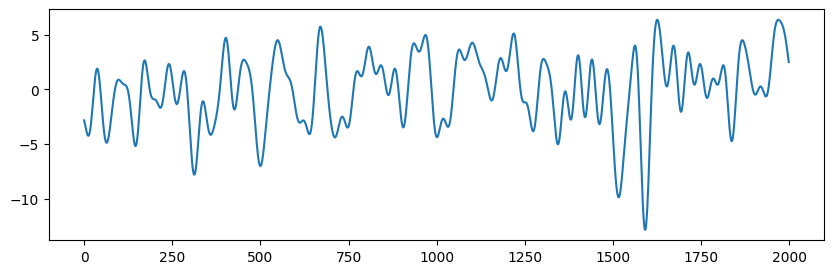

In [9]:
print("Dimensiones de los datos cargados: " + str(senal_continua_control.shape));
fig = plt.figure(figsize=(10,3))
#Se quiere observar el comportamiento de la señal del canal 1 y sus primeras 2000 muestras ( 0 - 2000)
plt.plot(senal_continua_control[0,0:2000])
plt.show()

2. Realizar el mismo proceso pero para las señales de sujetos que padecen la enfermedad de Parkinson

In [10]:
archivos=os.listdir(directorio_actual + "/parkinson") #devuelve lo que tiene la carpeta
print(len(archivos))
archivos[0] #archivos .mat

23


'P026_EP_reposo.mat'

In [11]:
#ruta de un archivo
path_subjecti_p=(directorio_actual + "/parkinson" + "/" + archivos[0])
#1 CARGAR EL ARCHIVO
data_parkinson = sio.loadmat(path_subjecti_p)
data_p=data_parkinson['data']

In [12]:
print("Variable python: " + str(type(data_p)));
#características básicas de ndarray
print("Tipo de variable cargada: " + str(data_p.dtype));
print("Dimensiones de los datos cargados: " + str(data_p.shape));
print("Numero de dimensiones: " + str(data_p.ndim));
print("Tamaño: " + str(data_p.size));
print("Tamaño en memoria (bytes): " + str(data_p.nbytes));

Variable python: <class 'numpy.ndarray'>
Tipo de variable cargada: float64
Dimensiones de los datos cargados: (8, 2000, 142)
Numero de dimensiones: 3
Tamaño: 2272000
Tamaño en memoria (bytes): 18176000


In [13]:
# Se va a reducir la dimension de los datos cargados
senal_continua_parkinson = np.reshape(data_p,(data_p.shape[0],data_p.shape[1]*data_p.shape[2]),order='F') #F --> asegurar MATLAB

Dimensiones de los datos cargados: (8, 284000)


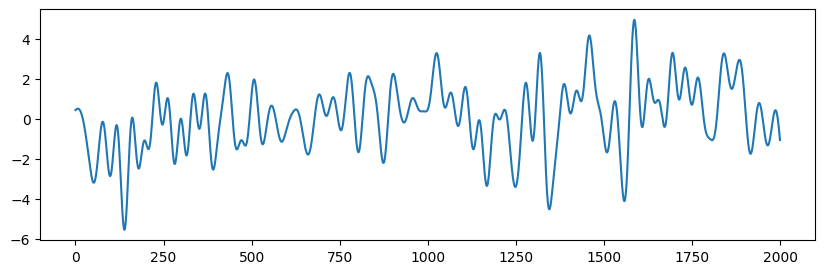

In [14]:
print("Dimensiones de los datos cargados: " + str(senal_continua_parkinson.shape));
fig = plt.figure(figsize=(10,3))
#Se quiere observar el comportamiento de la señal del canal 1 y sus primeras 2000 muestras ( 0 - 2000)
plt.plot(senal_continua_parkinson[0,0:2000])
plt.show()

## Función que recibe la señal y calcula su energía promedio para cada canal

Aunque se hizo de manera independiente la importación y organización de datos, estos solo se hicieron pero el canal 1. Es importante realizar una función que permita recibir una señal de múltiples canales y épocas y calcule la Energía promedio de cada canal.

In [15]:
#Funcion que pone promedios de muestras y promedios de épocas
import numpy as np

def energia_promedio(data):
    canales, _, epocas = data.shape
    energias = []

    for c in range(canales):
        promedios_epocas = [] #lista donde se incluyen los promedios de las épocas
        for e in range(epocas): #se recorre cada época para promediar sus muestras
            promedios_epocas.append(np.mean(data[c, :, e]**2))
        energias.append(np.mean(promedios_epocas))

    return np.array(energias)  # <-- así ya tiene .shape y es mas facil para más adelante



In [16]:
import os;

directorio_actual=os.getcwd();
print(directorio_actual)

fs = 250; #Frecuencia de muestreo
num_canales = 8; #número de canales

/content


## Energia promediada por épocas de cada canal para cada grupo poblacional

Este análisis se parte en dos:
1. Promedio de todos los puntos de cada una de las épocas presentes en cada canal de cada sujeto
$
E_{c,e} = \frac{1}{P} \sum_{p=1}^{P} \left( x_c^{(e)}[p] \right)^2
$

2. Promedio de cada una de las épocas del primer item, para cada canal de cada sujeto
$
E_{c} = \frac{1}{E} \sum_{e=1}^{E} E_{c,e}
$

- c = canal
- e = época
- p = punto (muestra dentro de la época)
- P = número de puntos por época
- E = número de épocas

In [18]:
import pandas as pd
#Para control
archivos_control=os.listdir(directorio_actual + "/control")
print(len(archivos_control))

#Cargar los controles de la carpeta control
for i in range(0,len(archivos_control)):
    #ruta de un archivo
    sujetoi=(directorio_actual + "/control" + "/" + archivos_control[i]);
    #CARGAR EL ARCHIVO
    data = sio.loadmat(sujetoi);
    data_control = data["data"];

# Lista para guardar energías promedio de cada sujeto
energias_control = []

# Iteramos sobre los archivos de sujetos control
for archivo in archivos_control:
    ruta = directorio_actual + "/control/" + archivo
    data = sio.loadmat(ruta)["data"]   # data con forma (canales, muestras, epocas)

    # Usamos la función definida previamente
    energias_sujeto = energia_promedio(data)  # devuelve un array con la energía promedio por canal
    energias_control.append(energias_sujeto)

# Convertimos la lista a DataFrame
canales = energias_control[0].shape[0]  # número de canales
df_control = pd.DataFrame(energias_control, columns=[f"Canal_{i+1}" for i in range(canales)])

# Ajustamos el índice para que sean los sujetos
df_control.index = archivos_control
df_control.index = df_control.index.str.extract(r'(\d+)')[0].astype(int)  # extrae el número --> ej: 34
df_control.index = "Sujeto Control " + df_control.index.astype(str) #le suma "sujeto" al número de arriba

# Se muestran los primeros 5 registros
df_control.head()

36


,Canal_1,Canal_2,Canal_3,Canal_4,Canal_5,Canal_6,Canal_7,Canal_8
0,,,,,,,,
Sujeto Control 15,8.783733,10.869256,14.714654,14.265100,12.293204,36.636914,34.376993,33.981398
Sujeto Control 10,5.598777,5.474184,6.368502,5.372581,5.164821,10.730803,7.746606,13.707188
Sujeto Control 31,7.399127,12.689970,7.178010,6.144328,5.847484,16.746774,16.223706,17.780930
Sujeto Control 21,12.903799,15.574167,14.320193,10.512889,9.125902,74.112767,61.977140,69.550354
Sujeto Control 29,6.676279,6.039521,6.028376,6.768551,6.709135,19.441852,18.980007,18.523418


In [20]:
import pandas as pd
import numpy as np
import scipy.io as sio #ayuda para trabajar con archivos tipo .MAT

archivos_park=os.listdir(directorio_actual + "/parkinson")
print(len(archivos_park))

#Cargar los controles de la carpeta control
for i in range(0,len(archivos_park)):
    #ruta de un archivo
    sujetoi=(directorio_actual + "/parkinson" + "/" + archivos_park[i]);
    #CARGAR EL ARCHIVO
    data = sio.loadmat(sujetoi);
    data_parkinson = data["data"];

# Lista para guardar energías promedio de cada sujeto
energias_parkinson = []

# Iteramos sobre los archivos de sujetos con Parkinson
for archivo in archivos_park:
    ruta_p = directorio_actual + "/parkinson/" + archivo
    data_p = sio.loadmat(ruta_p)["data"]   # data con forma (canales, muestras, epocas)

    # Usamos la función definida previamente
    energias_sujeto_p = energia_promedio(data_p)  # devuelve un array con la energía promedio por canal
    energias_parkinson.append(energias_sujeto_p)

# Convertimos la lista a DataFrame
canales_p = energias_parkinson[0].shape[0]  # número de canales
df_parkinson = pd.DataFrame(energias_parkinson, columns=[f"Canal_{i+1}" for i in range(canales_p)])

# Ajustamos el índice para que sean los sujetos
df_parkinson.index = archivos_park
df_parkinson.index = df_parkinson.index.str.extract(r'(\d+)')[0].astype(int)  # extrae el número
df_parkinson.index = "Sujeto Parkinson " + df_parkinson.index.astype(str)

# Mostramos los primeros registros
df_parkinson.head()


23


,Canal_1,Canal_2,Canal_3,Canal_4,Canal_5,Canal_6,Canal_7,Canal_8
0,,,,,,,,
Sujeto Parkinson 26,7.266230,8.930096,15.060492,14.784637,15.027486,11.044091,9.131259,9.227034
Sujeto Parkinson 18,11.829369,11.995128,15.316873,11.444447,9.966158,32.580716,30.276417,29.220524
Sujeto Parkinson 4,8.997830,6.000801,6.143172,7.392954,8.529217,31.991725,26.857730,33.201820
Sujeto Parkinson 20,11.723026,13.045671,18.320266,12.830111,15.665275,46.848064,33.845454,55.562172
Sujeto Parkinson 41,8.388289,10.234343,12.660311,12.018236,10.361866,38.195678,30.299565,40.792706


## Análisis estadístico comparativo entre grupos de sujetos

### Prueba de normalidad

Para la prueba de normalidad se aplica el test de Shapiro en donde se busca conocer si la distribución entre conjuntos, es normal.

Para este analisis se toma cada uno de los canales y se mide la normalidad entre todos los sujetos para los valores de energia de cada canal a estudiar. Es decir, se mide la normalidad por canal y no por sujeto.

In [21]:
from scipy.stats import shapiro

alpha = 0.05

for canal in df_control.columns: #recorre cada canal
    # datos de cada grupo
    datos_control = df_control[canal].dropna().values #valores de todos los sujetos para cada canal
    datos_parkinson = df_parkinson[canal].dropna().values  #valores de todos los sujetos para cada canal

    # prueba de Shapiro-Wilk
    _, p_control = shapiro(datos_control)
    _, p_parkinson = shapiro(datos_parkinson)

    # interpretación de los resultados de Shapiro
    normal_c = "Normal" if p_control > alpha else "No normal"
    normal_p = "Normal" if p_parkinson > alpha else "No normal"

    #Imprime los valores de los resultados
    print(f"{canal}: Control -> p={p_control:.4f} ({normal_c}), "
          f"Parkinson -> p={p_parkinson:.4f} ({normal_p})")


Canal_1: Control -> p=0.0063 (No normal), Parkinson -> p=0.0144 (No normal)
Canal_2: Control -> p=0.0040 (No normal), Parkinson -> p=0.0045 (No normal)
Canal_3: Control -> p=0.0089 (No normal), Parkinson -> p=0.0009 (No normal)
Canal_4: Control -> p=0.0002 (No normal), Parkinson -> p=0.0003 (No normal)
Canal_5: Control -> p=0.0008 (No normal), Parkinson -> p=0.0053 (No normal)
Canal_6: Control -> p=0.0000 (No normal), Parkinson -> p=0.0000 (No normal)
Canal_7: Control -> p=0.0000 (No normal), Parkinson -> p=0.0000 (No normal)
Canal_8: Control -> p=0.0000 (No normal), Parkinson -> p=0.0000 (No normal)


Para este análisis se realiza una comparativa entre los valores obtenidos y los valores deseados bajo la hipótesis de normalidad, esto se hace con el fin de observar la desviación de los datos teniendo en cuenta una normalidad [1].

Teniendo en cuenta el umbral a usar que corresponde a ser 0.05, se establece que:

- ***Hipotesis nula***: Los datos de los canales de todos los sujetos proviene de una distribución normal
- ***Hipotesis alternativa***: Los datos del canal no provienen de una distribución normal

Como se puede observar en los datos que se obtuvieron para ambos grupos poblacionales, ninguno de los 8 canales cumple con una distribución normal ya que cuentan con valores menores de 0.05 por ende se dice que se rechaza la hipotesis nula por ende los datos no provienen de una distribución normal. Estos resultados son los esperados ya que es común que en señales fisiológicas se obtengan este tipo de resultados alejados de la normalidad.

Teniendo en cuenta estos resultados, se prosigue a realizar la prueba de  homocedasticidad.

### Prueba de  homocedasticidad

In [22]:
from scipy.stats import levene

for canal in df_control.columns: #empieza a recorrer cada canal
    prueba_varianza, p_valor = levene(df_control[canal], df_parkinson[canal])
    print(f"{canal} p-valor homocedasticidad: {p_valor}")

Canal_1 p-valor homocedasticidad: 0.8848020019348577
Canal_2 p-valor homocedasticidad: 0.9590926426745954
Canal_3 p-valor homocedasticidad: 0.9776337925998679
Canal_4 p-valor homocedasticidad: 0.7592528471707681
Canal_5 p-valor homocedasticidad: 0.9045548264900758
Canal_6 p-valor homocedasticidad: 0.4719758936966434
Canal_7 p-valor homocedasticidad: 0.6178759981277988
Canal_8 p-valor homocedasticidad: 0.5940765419878595


Como se puede observar, la prueba de levene para cada uno de los canales da valores mayores a 0.05 es decir que es mucho mayor que el umbral por ende se dice que la hipótesis nula de igualdad de varianza no se rechaza, por ende se puede decir que los valores analizados presentan un comportamiento de homocedasticidad. El prinicipal objetivo de este estudio es poder determinar que tanta era la dispersión o varianza de los valores de energia del grupo control respecto al grupo de los sujetos que cuentan con Parkinson para cada uno de los canales [1], por ende se puede decir que los datos del grupo control y del grupo Parkinson tienen una dispersión similar en cada canal.

Teniendo en cuenta este resultado, no se puede seguir haciendo la prueba de t - student ya que, aunque cumple homocedasticidad, no cumplen con la condición de normalidad. Por lo tanto, se debe realizar un análisis no paramétrico (prueba
U de Mann-Whitney).

In [23]:
from scipy.stats import mannwhitneyu

for canal in df_control.columns: #empieza a recorrer cada canal
    prueba_u, p_valor = mannwhitneyu(df_control[canal], df_parkinson[canal])
    print(f"{canal} p-valor Prueba U de Mann - Whitney: {p_valor}")

Canal_1 p-valor Prueba U de Mann - Whitney: 0.4057005715724912
Canal_2 p-valor Prueba U de Mann - Whitney: 0.5705282028889593
Canal_3 p-valor Prueba U de Mann - Whitney: 0.46037288907343565
Canal_4 p-valor Prueba U de Mann - Whitney: 0.23446184956559823
Canal_5 p-valor Prueba U de Mann - Whitney: 0.5600175059745567
Canal_6 p-valor Prueba U de Mann - Whitney: 0.2800747649284743
Canal_7 p-valor Prueba U de Mann - Whitney: 0.11830081572892007
Canal_8 p-valor Prueba U de Mann - Whitney: 0.15054429358714408


Se aplicó la prueba U de Mann-Whitney para comparar dos grupos independientes: sujetos sanos y sujetos con Parkinson, considerando un nivel de significancia de α = 0.05 tambien conocido como un umbral. Para esto, al igual que en normalidad, se estableció una hipótesis nula y una alternativa.

- Hipótesis nula: no existen diferencias significativas en la distribución de los valores entre ambos grupos, es decir, provienen de la misma distribución. Es decir, no existe diferencia significativa entre los dos grupos teniendo en cuenta los datos del sujeto sano y del sujeto con la patología.

- Hipótesis alternativa: existen diferencias significativas en la distribución de los valores entre ambos grupos.

Al analizar los p-valores obtenidos para los ocho canales, se observa que en todos los casos p > 0.05. Esto significa que no se rechaza la hipótesis nula, por lo que no se encontraron diferencias estadísticamente significativas entre los sujetos sanos y los sujetos con Parkinson en ninguno de los canales evaluados.

Sin embargo, se destaca que los canales 7 (p = 0.118) y 8 (p = 0.150) presentan los valores más bajos, lo cual sugiere una tendencia hacia posibles diferencias que podrían volverse significativas con un mayor tamaño de muestra o con un análisis más específico.

En cuanto a un análisis fisiológico se puede determinar que es muy probable que los sujetos con parkkinson se encuentren en una fase temprana en donde los cambios no son bruscos ocasionando variaciones en las medidas. Esto se puede dar por ciertos mecanismos compensatorios como la plasticidad neuronal [2].

## Conclusiones:
- El procesamiento y análisis de las señales EEG permitió organizar y comparar los datos de sujetos sanos y con Parkinson, mostrando la utilidad de las herramientas estadísticas para evaluar posibles diferencias en la energía de las señales.

- Aunque no se evidenciaron diferencias estadísticamente significativas entre los grupos, el ejercicio permitió comprender la importancia del tamaño de muestra, la variabilidad de los datos y la elección de los canales en el resultado de las pruebas, asi como entender la disposición de las señales y entender como funciona el EEC.

- La práctica reforzó el aprendizaje en la aplicación de pruebas no paramétricas como la de Mann-Whitney y mostró cómo los resultados estadísticos se relacionan con los analisis fisiológicos y metodológicos.

## Referencias:
[1] A. J. Mesa Guerrero y S. J. Caicedo Zambrano, Algunas pruebas estadísticas no paramétricas. San Juan de Pasto, Nariño: Editorial Universidad de Nariño, 2025. Sired

[2] “Plasticidad cerebral (o neuroplasticidad): ¿qué es?”, Psicología y Mente. Disponible en: https://psicologiaymente.com/neurociencias/plasticidad-cerebral-neuroplasticidad